In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [52]:
def porosity_periodic(r,a):
    x = r/a
    if(x < 0.5):
        return (1.0 - 4.0*np.pi*x**3/3.0)
    elif(x<=1.0/np.sqrt(2.0)):
        return (1.0+np.pi/4.0-3.0*np.pi*x**2+8*np.pi*x**3/3.0)
    else:
        return 0.0

def surface_to_volume_periodic(r,a):
    x = r/a
    num = 0.0
    div = 0.0
    if(x<0.5):
        num = 4.0*np.pi*x**2
        div = 1.0-4.0*np.pi*x**3/3.0
    elif(x<=1.0/np.sqrt(2.0)):
        num = 2.0*np.pi*x*(3-4*x)
        div = 1.0+np.pi/4.0-3.0*np.pi*x**2+8*np.pi*x**3/3.0
    else:
        num = np.nan
        div = 1.0
    return num/(a*div)

def pade_approx(t, Dm, svp, tau, theta):
    fac = (1.0-1.0/tau)
    num = (4.0/9.0)*np.sqrt(Dm*t/np.pi)*svp + (fac*t/theta)
    div = fac+num
    return Dm * (1.0 - fac*num/div)

<IPython.core.display.Javascript object>


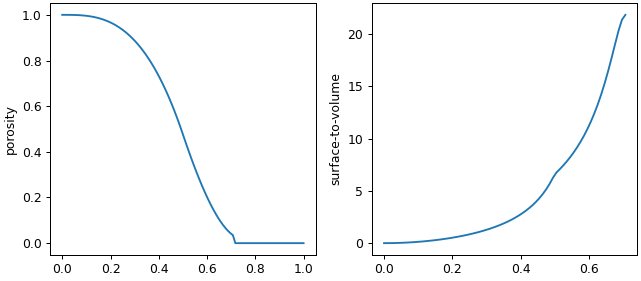

Text(0, 0.5, 'surface-to-volume')

In [53]:
a = 1.0
radius = np.linspace(0.0,1.0,100)
phis = np.zeros(100)
svps = np.zeros(100)

for i,r in enumerate(radius):
    phis[i]=porosity_periodic(r,a)
    svps[i]=surface_to_volume_periodic(r,a)

fig,axs = plt.subplots(1,2,figsize=(8,3.5),constrained_layout=True)
axs[0].plot(radius,phis)
axs[0].set_ylabel('porosity')
axs[1].plot(radius,svps)
axs[1].set_ylabel('surface-to-volume')

In [54]:
plt.close('all')

<IPython.core.display.Javascript object>


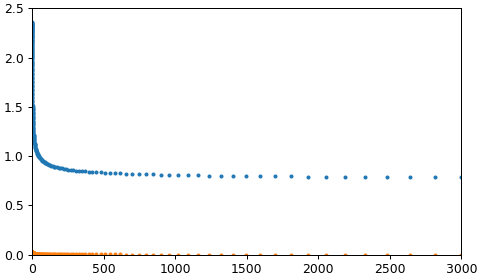

(0.0, 2.5)

In [89]:
times = np.logspace(np.log10(1e-2),np.log10(3000.0),200)
Dm1 = 2.5
a1 = 10.0
r1 = 6.5
theta1 = 1e3
svp1 = surface_to_volume_periodic(r1,a1)
tau1 = 1.0/0.3

Dt1 = pade_approx(times, Dm1, svp1, tau1, theta1)

Dm2 = 0.01*Dm1
a2 = 100.0
r2 = 50.0
theta2 = 1e1
svp2 = 3.0/r2
tau2 = 1.0/0.01

Dt2 = pade_approx(times, Dm2, svp2, tau2, theta2)


# plot figs
fig,axs = plt.subplots(1,1,figsize=(6,3.5),constrained_layout=True)
axs.scatter(times,Dt1,s=5)
axs.scatter(times,Dt2,s=5)
axs.set_xlim([0,3000])
axs.set_ylim([0,Dm1])




In [74]:
plt.close('all')

In [86]:
print(svp1, svp2)

15.689483628207395 0.06
